In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data
import datetime

In [84]:
import warnings
warnings.filterwarnings("ignore")

In [85]:
import yfinance as yf
df = yf.download('AAPL',start='2010-01-01')
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478998,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490201,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386964,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375157,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417541,447610800
...,...,...,...,...,...,...
2023-11-27,189.919998,190.669998,188.899994,189.789993,189.789993,40552600
2023-11-28,189.779999,191.080002,189.399994,190.399994,190.399994,38415400
2023-11-29,190.899994,192.089996,188.970001,189.369995,189.369995,43014200


In [86]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478998,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490201,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386964,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375157,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417541,447610800


In [87]:
df.drop(['Date','Adj Close'],axis=1,inplace=True)

In [88]:
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


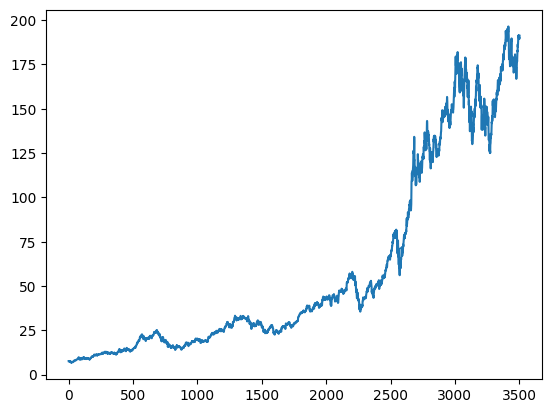

In [89]:
plt.plot(df.Close)

In [90]:
ma100 = df.Close.rolling(100).mean()
ma200 = df.Close.rolling(200).mean()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


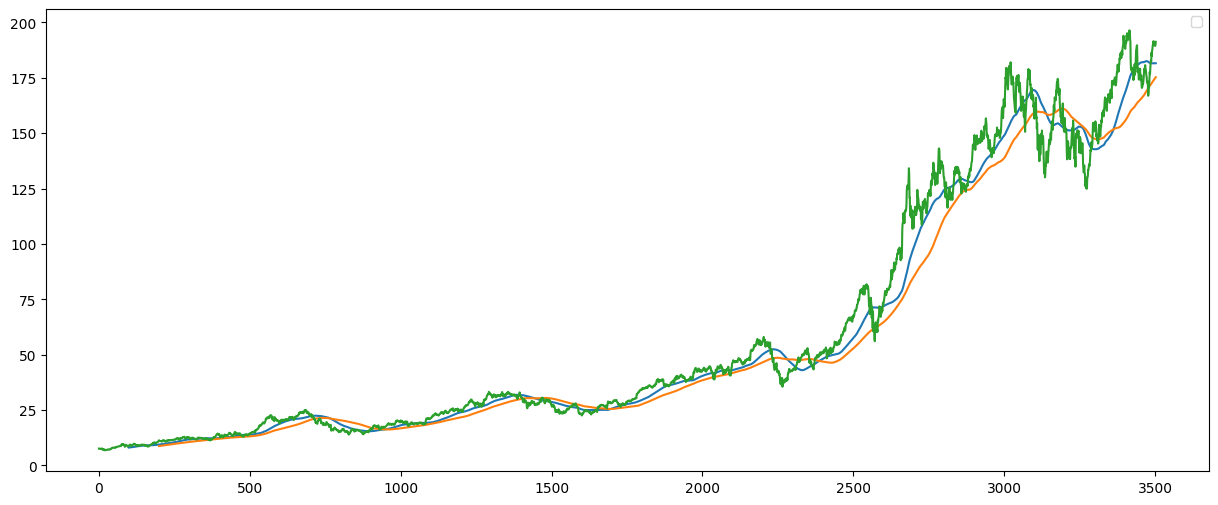

In [91]:
plt.figure(figsize=(15,6))
plt.plot(ma100)
plt.plot(ma200)
plt.plot(df.Close)
plt.legend()

In [92]:
df.shape

(3503, 5)

In [93]:
df1=pd.DataFrame(df['Close'])
df1

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714
...,...
3498,189.789993
3499,190.399994
3500,189.369995
3501,189.949997


In [94]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(df1)
df1.shape

(3503, 1)

In [95]:
train_data,test_data=df1[0:int(len(df)*0.8)],df1[int(len(df)*0.8):]

In [96]:
train_data.shape

(2802, 1)

In [97]:
test_data.shape

(701, 1)

In [98]:
def split(dataset):
	time_step=100
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [99]:
X_train,y_train=split(train_data)
X_test,y_test=split(test_data)

In [100]:
print(X_test.shape)
print(y_test.shape)

(600, 100)
(600,)


In [101]:
print(X_train.shape)
print(y_train.shape)

(2701, 100)
(2701,)


In [102]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [103]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [104]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
43/43 [==============================] - 8s 117ms/step - loss: 0.0043 - val_loss: 0.0019
Epoch 2/50
43/43 [==============================] - 4s 100ms/step - loss: 2.0701e-04 - val_loss: 0.0018
Epoch 3/50
43/43 [==============================] - 4s 98ms/step - loss: 1.8415e-04 - val_loss: 0.0019
Epoch 4/50
43/43 [==============================] - 4s 103ms/step - loss: 2.1713e-04 - val_loss: 0.0020
Epoch 5/50
43/43 [==============================] - 4s 95ms/step - loss: 1.7564e-04 - val_loss: 0.0019
Epoch 6/50
43/43 [==============================] - 4s 101ms/step - loss: 1.8952e-04 - val_loss: 0.0029
Epoch 7/50
43/43 [==============================] - 4s 100ms/step - loss: 1.8934e-04 - val_loss: 0.0015
Epoch 8/50
43/43 [==============================] - 4s 103ms/step - loss: 1.6047e-04 - val_loss: 0.0017
Epoch 9/50
43/43 [==============================] - 5s 106ms/step - loss: 1.5964e-04 - val_loss: 0.0014
Epoch 10/50
43/43 [==============================] - 5s 106ms/step - l

In [154]:
X_test.shape

(600, 100)

In [105]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

19/19 [==============================] - 0s 21ms/step


In [106]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [107]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

44.30948099946017

In [108]:
math.sqrt(mean_squared_error(y_test,test_predict))

158.0272502064376

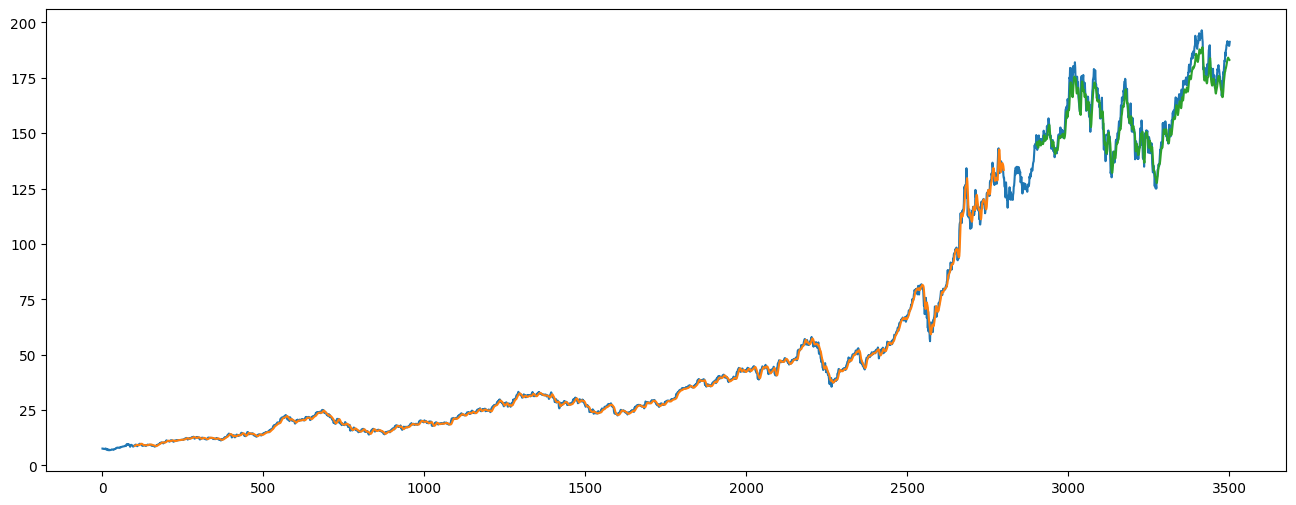

In [116]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize=(16,6))
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [222]:
len(test_data)

701

In [223]:
x_input=test_data[601:].reshape(1,-1)

In [224]:
x_input.shape

(1, 100)

In [225]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [267]:
import numpy as np

In [268]:

num_days_to_predict = 30
predicted_values = []
for _ in range(num_days_to_predict):
    input_data = np.array([temp_input[-100:]])
    predicted_price = model.predict(input_data)[0][0]
    predicted_values.append(predicted_price)
    temp_input = temp_input[1:]
    temp_input.append(predicted_price)

print("Predicted Stock Prices for the Next 30 Days:")
print(predicted_values)


1/1 [==============================] - 0s 21ms/step
Predicted Stock Prices for the Next 30 Days:
[0.74181247, 0.7406814, 0.7395722, 0.7384848, 0.7374186, 0.73637384, 0.7353498, 0.73434633, 0.7333629, 0.7323992, 0.7314545, 0.73052853, 0.7296207, 0.72873056, 0.7278574, 0.7270009, 0.72616065, 0.7253361, 0.7245268, 0.7237325, 0.72295296, 0.7221876, 0.7214362, 0.7206983, 0.7199741, 0.7192627, 0.7185643, 0.71787864, 0.7172051, 0.7165435]


In [269]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [270]:
len(df1)

3503

In [271]:
df1.shape

(3503, 1)

In [272]:
new_pred= np.array(predicted_values)
new_pred= new_pred.reshape(-1,1)
new_pred.shape

(30, 1)

In [273]:
npp=scaler.inverse_transform(new_pred)
df3= scaler.inverse_transform(df1)

In [275]:
npp = pd.DataFrame(npp)
df3= pd.DataFrame(df3)

In [277]:
df3

,0
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714
...,...
3498,189.789993
3499,190.399994
3500,189.369995
3501,189.949997


In [ ]:
plotdf=